<a href="https://colab.research.google.com/github/GeoJere01/001_streamlit_redaction_improver/blob/main/Search_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First networkx library is imported
import networkx as nx

In [2]:
#create graph
G = nx.Graph()
#add edges
G.add_edge(0, 2)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(5, 3)
G.add_edge(3, 4)
G.add_edge(1, 0)

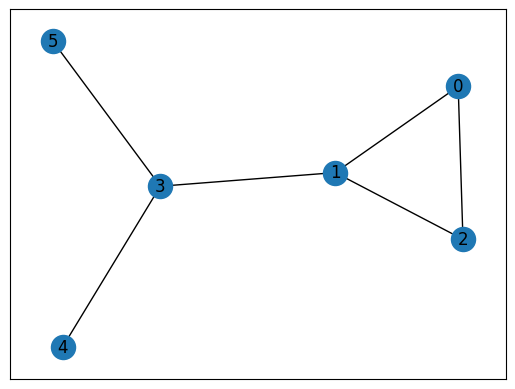

In [8]:
#use library function to visualise network
nx.draw_networkx(G)

Some useful methods:

1.   To get nodes list (where G = nx.Graph()): **G.nodes()**
2.   To remove a node of a graph: **G.remove_node(3)**
3.   To find the degree of a node: **G.degree(3)**
4.   To get a list of edges: **G.edges()**
5.   To get the neoighbours of a node: **G.neighbours()**

Consult the documentation for more examples: https://networkx.org/documentation/stable/tutorial.html



In [ ]:
print("Total number of nodes: ", int(G.number_of_nodes()))
print("Total number of edges: ", int(G.number_of_edges()))
print("List of all nodes: ", list(G.nodes()))
print("List of all edges: ", list(G.edges(data = True)))
print("Degree for all nodes: ", dict(G.degree()))

print("Total number of self-loops: ", int(nx.number_of_selfloops(G)))
print("List of all nodes with self-loops: ",
             list(nx.nodes_with_selfloops(G)))

print("List of all nodes we can go to in a single step from node 2: ",
                                                 list(G.neighbors(2)))

Total number of nodes:  6
Total number of edges:  6
List of all nodes:  [0, 2, 1, 3, 5, 4]
List of all edges:  [(0, 2, {}), (0, 1, {}), (2, 1, {}), (1, 3, {}), (3, 5, {}), (3, 4, {})]
Degree for all nodes:  {0: 2, 2: 2, 1: 3, 3: 3, 5: 1, 4: 1}
Total number of self-loops:  0
List of all nodes with self-loops:  []
List of all nodes we can go to in a single step from node 2:  [0, 1]


In [ ]:
#attach weights to the graph
weights=[5,4,6,7,8,9]
node_names=['Blantyre','Lilongwe','Nsanje','Kasungu','Mzuzu','Karonga']
regions=['South','Central','South','Central','North','North']
G.edges()

EdgeView([(0, 2), (0, 1), (2, 1), (1, 3), (3, 5), (3, 4)])

In [ ]:
i=0
for e in G.edges():
  G.edges[e[0],e[1]]['weight']=weights[i]
  i+=1
  print(e,type(e),e[0],e[1])
print(G.edges(data = True))

(0, 2) <class 'tuple'> 0 2
(0, 1) <class 'tuple'> 0 1
(2, 1) <class 'tuple'> 2 1
(1, 3) <class 'tuple'> 1 3
(3, 5) <class 'tuple'> 3 5
(3, 4) <class 'tuple'> 3 4
[(0, 2, {'weight': 5}), (0, 1, {'weight': 4}), (2, 1, {'weight': 6}), (1, 3, {'weight': 7}), (3, 5, {'weight': 8}), (3, 4, {'weight': 9})]


In [ ]:
#add names of nodes from the list node_names
print(type(G.nodes()),G.nodes())
G.nodes().data()
i=0
for node in G.nodes():
  G.nodes[node]['city name']=node_names[i]
  G.nodes[node]['region']=regions[i]
  i+=1
print(G.nodes().data())

<class 'networkx.classes.reportviews.NodeView'> [0, 2, 1, 3, 5, 4]
[(0, {'city name': 'Blantyre', 'region': 'South'}), (2, {'city name': 'Lilongwe', 'region': 'Central'}), (1, {'city name': 'Nsanje', 'region': 'South'}), (3, {'city name': 'Kasungu', 'region': 'Central'}), (5, {'city name': 'Mzuzu', 'region': 'North'}), (4, {'city name': 'Karonga', 'region': 'North'})]


In [ ]:
print(type(G))
print(G.nodes().data())
print(G.neighbors(0))

<class 'networkx.classes.graph.Graph'>
[(0, {'city name': 'Blantyre', 'region': 'South'}), (2, {'city name': 'Lilongwe', 'region': 'Central'}), (1, {'city name': 'Nsanje', 'region': 'South'}), (3, {'city name': 'Kasungu', 'region': 'Central'}), (5, {'city name': 'Mzuzu', 'region': 'North'}), (4, {'city name': 'Karonga', 'region': 'North'})]


In [ ]:
L1 =[x for x in G.neighbors(1)]
L2=[]
for x in G.neighbors(1):
  L2.append(x)
print(L1)
print(L2)

[2, 3, 0]
[2, 3, 0]


In [ ]:
Visited=[] #list of nodes
Q=[] #list of paths - tuple (A S)
S='0'
G = '5'
Q.append([S]) #added the start position onto the queue
print(Q)
#c=Q.pop(0)[0]
#print(c)

[['0']]


In [ ]:
#working with tuples
t1=['0']
#add '1' to the front of the list
t1.insert(0,'1')
print(t1)

['1', '0']


In [ ]:
# Implementing Breadth First Search
#initialise the Q and visited
Q=[]
Visited =[]
#set the start and goal
Start = 0
Goal = 5
#added the starting position on to the Q and Visited
Q.append([Start])
Visited.append(Start)
#Start the main loop of the algorithm
# In Q we store paths for example [2,0] from the start position
while (len(Q)>0): # while Q is not empty
  #check the first
   element in Q if it is the goal
  currentPath=Q.pop()
  currentNode = currentPath[0] #this is a path in reverse with th elast element being the Start
  #print(currentPath,currentNode)
  #check if element is the goal then stop
  if (currentNode == Goal):
    print("Found a path to the goal:", currentPath)
    break
  else:
    Neighbours=G.neighbors(currentNode)
    #print("The neighbours of ",currentNode, " are ",Neighbours)
    for n in Neighbours:
      if n not in Visited:
        #print("adding ",n, " neighbour of ", currentNode)
        initialPath = currentPath.copy()
        initialPath.insert(0,n)
        Q.append(initialPath)
        #print(Q)
        Visited.append(n)


  #for all neighbours of current that are not Visited
  #    add paths into Q

[0] 0
adding  2  neighbour of  0
[[2, 0]]
adding  1  neighbour of  0
[[2, 0], [1, 0]]
[[2, 0], [1, 0]]
[1, 0] 1
adding  3  neighbour of  1
[[2, 0], [3, 1, 0]]
[[2, 0], [3, 1, 0]]
[3, 1, 0] 3
adding  5  neighbour of  3
[[2, 0], [5, 3, 1, 0]]
adding  4  neighbour of  3
[[2, 0], [5, 3, 1, 0], [4, 3, 1, 0]]
[[2, 0], [5, 3, 1, 0], [4, 3, 1, 0]]
[4, 3, 1, 0] 4
[[2, 0], [5, 3, 1, 0]]
[5, 3, 1, 0] 5
Found a path to the goal: [5, 3, 1, 0]


TASK 1. Modify the algorithm above to implement Depth First Search

TASK 2. Modify the algorithm above and use Collection deque class for Q instead.

TASK 3. Modify the algorithm to implement Best First Search.

TASK 4. Use a map of Malawi and select any region that contains (a minimum of 10) places and use Google maps to find distances between them. Then create a graph and run the algorithms above to find the shortest distances between two points.

FOR ALL POINTS ABOVE WORK IN GROUPS (Same groups as for the Mini Expert System) -
You should complete only what you manage. So work according to your abilities so that you can learn. Do not copy from someone else. This is a learning exercises.
You will submit your work and documentation explaining what you did via a google form which I will send out soon.
The due date for this is 26th April.